In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [3]:
train=pd.read_csv(r'G:/Documents/Facebook bid/data/train.csv')
test=pd.read_csv(r'G:/Documents/Facebook bid/data/test.csv')
bids=pd.read_csv(r'G:/Documents/Facebook bid/data/bids.csv')

### 处理缺失数据

##### 针对前面数据探索部分所发现的竞标行为数据中存在的国家属性缺失问题，考虑使用针对原始行为数据按照用户分组后，按时间顺序对每组用户中的缺失值前向或后向填充相邻的国家信息的方法来进行缺失值的填充处理

### 填充country的缺失值

In [4]:
display(bids.head(5))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [5]:
# 查看出价时间是否是降序排列
print('Is the time monotonically non-decreasing?',
      pd.Index(bids['time']).is_monotonic)

Is the time monotonically non-decreasing? False


In [6]:
# 利用bidder_id分组，以及将bidder_id 和time进行排序
# bidder_group=bids.sort_values(['bidder_id','time']).groupby('bidder_id')
bids['country']=bids.sort_values(['bidder_id','time']).groupby('bidder_id')['country'].ffill()
bids['country']=bids.sort_values(['bidder_id','time']).groupby('bidder_id')['country'].bfill()

ffill/pad：用前一个非缺失值填充该缺失值；
bfill/backfill：用下一个非缺失值填充该缺失值
None：指定一个值去替换缺失值

In [7]:
print('Is there any missing value in bids',bids.isnull().any().any())

Is there any missing value in bids True


In [8]:
# 查看缺失值补充后的值
missing_country=bids['country'].isnull().sum()
normal_country=bids['country'].notnull().sum()
print('No. of missing country:',missing_country)
print('No. of normal country:',normal_country)

No. of missing country: 5
No. of normal country: 7656329


在对整体数据的部分用户缺失国家的按照各个用户分组后在时间上前向和后向填充后，仍然存在5个用户缺失了国家信息，结果发现这5个用户是仅有一次竞标行为.

In [22]:
nan_rows = bids[bids.isnull().T.any().T]
print (nan_rows)

          bid_id                              bidder_id auction  \
1351177  1351177  f3ab8c9ecc0d021ebc81e89f20c8267bn812w   jefix   
2754184  2754184  88ef9cfdbec4c9e33f6c2e0b512e7a01dp2p2   cc5fs   
2836631  2836631  29b8af2fea3881ef61911612372dac41vczqv   jqx39   
3125892  3125892  df20f216cbb0b0df5a7b2e94b16a7853iyw9g   jqx39   
5153748  5153748  5e05ec450e2dd64d7996a08bbbca4f126nzzk   jqx39   

              merchandise    device              time country  \
1351177  office equipment   phone84  9767200789473684     NaN   
2754184            mobile  phone150  9633363947368421     NaN   
2836631           jewelry   phone72  9634034894736842     NaN   
3125892   books and music  phone106  9635755105263157     NaN   
5153748            mobile  phone267  9645270210526315     NaN   

                      ip              url  
1351177   80.211.119.111  g9pgdfci3yseml5  
2754184     20.67.240.88  ctivbfq55rktail  
2836631  149.210.107.205  vasstdc27m7nks3  
3125892      26.23.62.59  ac9x

In [24]:
nan_bidder = nan_rows['bidder_id'].values.tolist()
# print nan_bidder
print (bids[bids['bidder_id'].isin(nan_bidder)])

          bid_id                              bidder_id auction  \
1351177  1351177  f3ab8c9ecc0d021ebc81e89f20c8267bn812w   jefix   
2754184  2754184  88ef9cfdbec4c9e33f6c2e0b512e7a01dp2p2   cc5fs   
2836631  2836631  29b8af2fea3881ef61911612372dac41vczqv   jqx39   
3125892  3125892  df20f216cbb0b0df5a7b2e94b16a7853iyw9g   jqx39   
5153748  5153748  5e05ec450e2dd64d7996a08bbbca4f126nzzk   jqx39   

              merchandise    device              time country  \
1351177  office equipment   phone84  9767200789473684     NaN   
2754184            mobile  phone150  9633363947368421     NaN   
2836631           jewelry   phone72  9634034894736842     NaN   
3125892   books and music  phone106  9635755105263157     NaN   
5153748            mobile  phone267  9645270210526315     NaN   

                      ip              url  
1351177   80.211.119.111  g9pgdfci3yseml5  
2754184     20.67.240.88  ctivbfq55rktail  
2836631  149.210.107.205  vasstdc27m7nks3  
3125892      26.23.62.59  ac9x

In [28]:
lst_nan_train = [i for i in nan_bidder if i in (train['bidder_id'].unique()).tolist()]
lst_nan_test = [i for i in nan_bidder if i in (test['bidder_id'].unique()).tolist()]
print ('No. of bidders 1 bid in train set: ',len(lst_nan_train))
print ('No. of bidders 1 bid in test set: ',len(lst_nan_test))

No. of bidders 1 bid in train set:  1
No. of bidders 1 bid in test set:  4


In [33]:
print(train[train['bidder_id']==lst_nan_train[0]]['outcome'])

546    0.0
Name: outcome, dtype: float64


由于这5个用户仅有一次竞标行为，而且其中1个用户来自训练集，4个来自测试集，由训练集用户的标记为人类，加上行为数太少，所以考虑对这5个用户的竞标行为数据予以舍弃，特别对测试集的4个用户后续操作类似之前对无竞标行为的用户，预测值填充最终模型的平均预测值

In [34]:
bid_to_drop = nan_rows.index.values.tolist()
# print bid_to_drop
bids.drop(bids.index[bid_to_drop], inplace=True)

In [35]:
print ('Is there any missing value in bids?',bids.isnull().any().any())

Is there any missing value in bids? False


## 统计基本的计数特征

根据前面的数据探索，由于数据集大部分由类别数据或者离散型数据构成，所以首先针对竞标行为数据按照竞标者分组统计其各项属性的数目，比如使用设备种类，参与竞标涉及国家，ip种类等等

In [9]:
# 根据bidder_id 进行分组
bidder=bids.groupby('bidder_id')

In [10]:
def feature_count(group):
    dct_cnt={}
    dct_cnt['devices_c']=group['device'].unique().shape[0]
    dct_cnt['countries_c'] = group['country'].unique().shape[0]
    dct_cnt['ip_c'] = group['ip'].unique().shape[0]
    dct_cnt['url_c'] = group['url'].unique().shape[0]    
    dct_cnt['auction_c'] = group['auction'].unique().shape[0]
    dct_cnt['auc_mean'] = np.mean(group['auction'].value_counts())   
    dct_cnt['merch_c'] = group['merchandise'].unique().shape[0]
    dct_cnt['bids_c'] = group.shape[0]
    dct_cnt = pd.Series(dct_cnt)
    return dct_cnt

In [11]:
cnt_bidder=bidder.apply(feature_count)

In [12]:
display(cnt_bidder.describe())

,auc_mean,auction_c,bids_c,countries_c,devices_c,ip_c,merch_c,url_c
count,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000,6614.000000
mean,6.589264,57.807832,1157.595101,12.724977,73.437557,544.096311,1.000151,290.744935
std,29.998289,131.773477,9593.019312,22.550348,172.117540,3369.489261,0.012296,2225.085049
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.674872,10.000000,18.000000,3.000000,8.000000,12.000000,1.000000,5.000000
75%,4.142857,47.000000,187.000000,12.000000,57.000000,110.750000,1.000000,36.000000
max,1327.366667,1726.000000,515033.000000,178.000000,2618.000000,111918.000000,2.000000,81376.000000


#### 特征的相关性

在对竞标行为数据按照用户分组后，对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix），来看看各特征之间的相关性

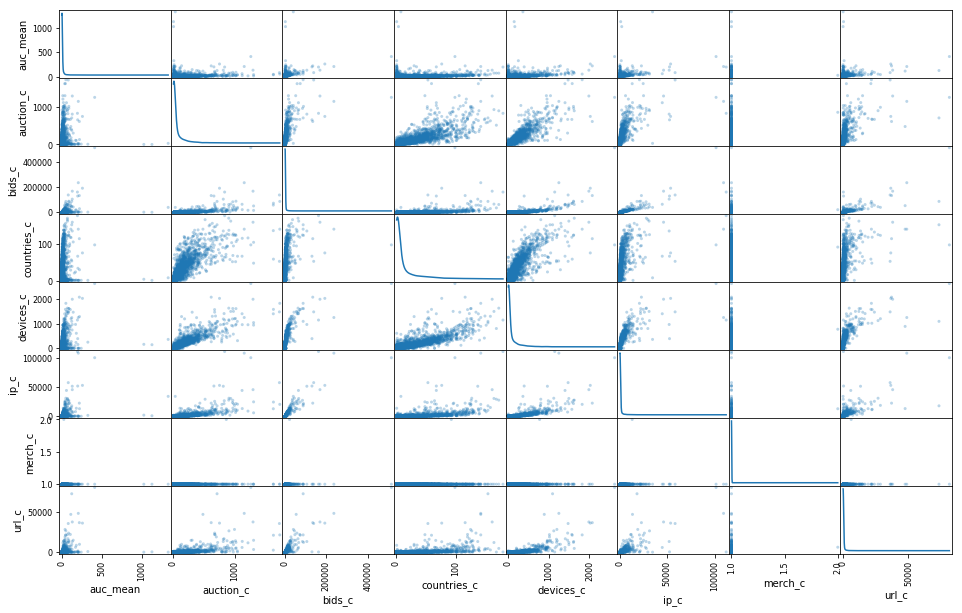

In [13]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(cnt_bidder, alpha = 0.3, figsize = (16,10), diagonal = 'kde')
plt.show()

在针对竞标行为数据按照竞标用户进行分组基本统计后由上表可以看出，此时并未考虑时间戳的情形下，有以下基本结论：

1、由各项统计的最大值与中位值，75%值的比较可以看到除了商品类别一项，其他的几项多少都存在一些异常数值，或许可以作为异常行为进行观察
2、各特征的倾斜度很大，考虑对特征进行取对数的操作，并再次输出散布矩阵看看相关性。
3、商品类别计数这一特征的方差很小，而且从中位数乃至75%的统计来看，大多数用户仅对同一类别商品进行拍卖，而且因为前面数据探索部分发现商品类别本身适合作为类别数据，所以考虑分多个类别进行单独统计，而在计数特征中舍弃该特征。

将merch_c这一列删除，将原数组名对应的内存值直接改变

In [14]:
cnt_bidder.drop('merch_c', axis=1, inplace=True)

###### drop()函数的使用：drop函数删除表中的某一行或者某一列，它不改变原有的df中的数据，而是返回另一个dataframe来存放删除后的数据。
1、df.dropna():将所有含有nan项的row删除
2、df.dropna(axis=1,thresh=3):将在列的方向上三个为NaN的项删除
3、df.dropna(how='ALL'):将全部项都是nan的row删除
4、df.fillna({1:0,2:0.5}):对第一列nan值赋0，第二列赋值0.5
5、df.fillna(method='ffill'):在列方向上以前一个值作为值赋给NaN
6、drop(['a'])
7、drop(['b'],axis=1):drop函数默认删除行，列需要加axis=1

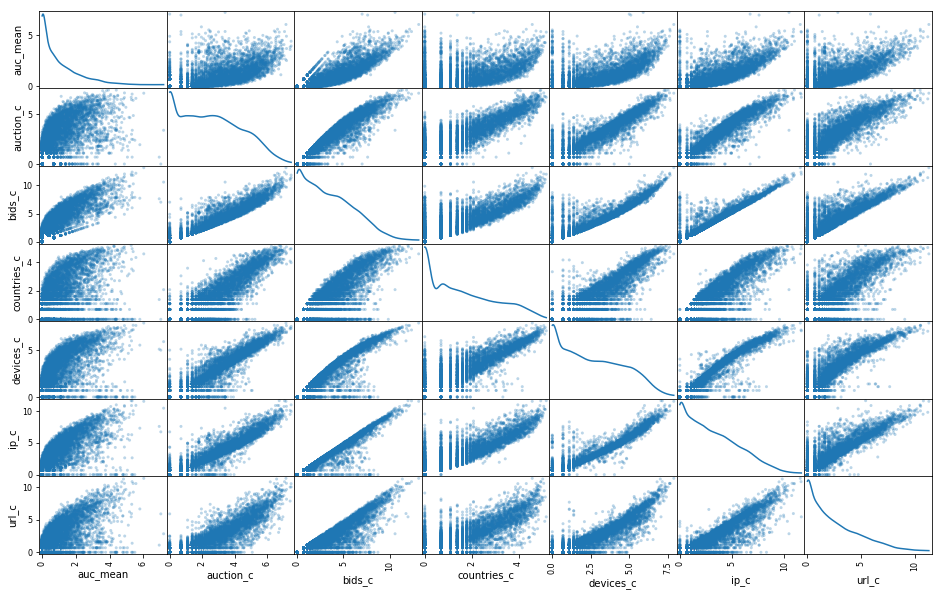

In [15]:
# 将cnt_bidder的值取对数
cnt_bidder=np.log(cnt_bidder)
pd.plotting.scatter_matrix(cnt_bidder, alpha = 0.3, figsize = (16,10), diagonal = 'kde')
plt.show()

由上面的散布矩阵可以看到，个行为特征之间并没有表现出很强的相关性，虽然其中的ip计数和竞标计数，设备计数在进行对数操作处理之后表现出轻微的正相关性，但是由于是在做了对数操作之后才体现，而且从图中可以看到并非很强的相关性，所以保留这三个特征。

针对前述的异常行为，先从原train数据集中的机器人、人类中分别挑选几个样本进行追踪观察他们在按照bidders分组后的统计结果，对比看看

In [16]:
cnt_bidder.to_csv('cnt_bidder.csv')

## 特征提取

1、对时间戳的处理：主要是分析各个竞标行为的时间间隔，即统计竞标行为表中在同一拍卖场的各个用户之间的竞标行为间隔；然后针对每个用户对其他用户的时间间隔计算
时间间隔均值
时间间隔最大值
时间间隔最小值

In [38]:
from collections import defaultdict
